# Exercise

Regression problem:
- Predicting the insurance charges based on some features
- Using Neural Network Regression Model

In [1]:
# import necessary library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the insurance file
data = pd.read_csv("../../data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Encode the categorical data**

In [9]:
# Panda one-hot encoding

insurance_one_hot = pd.get_dummies(data)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


**Train & Test Split**

In [13]:
# Create X and y 

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [14]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [58]:
# Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [59]:
X_train.shape

(1070, 11)

In [60]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [61]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [62]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


**Build the Neural Network Model**

In [63]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[11]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                120       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# fit model
model.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13297.6777 - mae: 13297.6777
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13063.2070 - mae: 13063.2070
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12473.7715 - mae: 12473.7715
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11396.8145 - mae: 11396.8145
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9999.1211 - mae: 9999.1211
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8678.6230 - mae: 8678.6230
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7786.9478 - mae: 7786.9478
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7485.1807 - mae: 7485.1807
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.7295 - mae: 7422.7295
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7397.9360 - mae: 7

34/34 [==============================] - 0s 2ms/step - loss: 5837.3857 - mae: 5837.3857
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5815.6357 - mae: 5815.6357
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5790.0659 - mae: 5790.0659
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5775.3857 - mae: 5775.3857
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5746.5288 - mae: 5746.5288
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5721.4546 - mae: 5721.4546
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5698.3057 - mae: 5698.3057
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5671.4565 - mae: 5671.4565
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5645.3267 - mae: 5645.3267
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5621.7617 - mae: 5621.7617
Epo

In [67]:
X_test = tf.convert_to_tensor(X_test.to_numpy(), dtype=tf.float64)

In [68]:
# Check the result of the model

model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5246.3740 - mae: 5246.3740


[5246.3740234375, 5246.3740234375]

In [71]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve the model

In [74]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
model_2.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 11353.9092 - mae: 11353.9092
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7502.6279 - mae: 7502.6279
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7284.6470 - mae: 7284.6470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7044.7803 - mae: 7044.7803
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6791.4551 - mae: 6791.4551
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6515.0195 - mae: 6515.0195
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6373.3970 - mae: 6373.3970
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6216.7227 - mae: 6216.7227
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6063.9180 - mae: 6063.9180
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5847.4546 - mae: 5847.45

34/34 [==============================] - 0s 2ms/step - loss: 3583.1460 - mae: 3583.1460
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3542.2520 - mae: 3542.2520
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3507.0212 - mae: 3507.0212
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3509.6177 - mae: 3509.6177
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3515.2747 - mae: 3515.2747
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3588.4089 - mae: 3588.4089
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3551.6006 - mae: 3551.6006
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3564.8374 - mae: 3564.8374
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3523.0129 - mae: 3523.0129
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3513.1543 - mae: 3513.1543
Epo

In [75]:
# Check the result of the model

model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3164.8621 - mae: 3164.8621


[3164.862060546875, 3164.862060546875]

**Train for 200 epochs**

In [80]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
histroy = model_3.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 11537.2080 - mae: 11537.2080
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7518.3892 - mae: 7518.3892
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7299.0947 - mae: 7299.0947
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7061.8462 - mae: 7061.8462
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 6813.1089 - mae: 6813.1089
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6535.1216 - mae: 6535.1216
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6390.6289 - mae: 6390.6289
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6224.4521 - mae: 6224.4521
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 6079.5312 - mae: 6079.5312
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5879.8691 - mae: 5879.86

34/34 [==============================] - 0s 3ms/step - loss: 3570.5789 - mae: 3570.5789
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 3525.3564 - mae: 3525.3564
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 3510.2905 - mae: 3510.2905
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 3502.6367 - mae: 3502.6367
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 3506.7632 - mae: 3506.7632
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 3550.8423 - mae: 3550.8423
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 3623.1426 - mae: 3623.1426
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 3534.0718 - mae: 3534.0718
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 3504.6301 - mae: 3504.6301
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 3513.9905 - mae: 3513.9905
Epo

34/34 [==============================] - 0s 3ms/step - loss: 3537.7278 - mae: 3537.7278
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3515.8513 - mae: 3515.8513
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3509.6003 - mae: 3509.6003
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3638.3125 - mae: 3638.3125
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3544.4336 - mae: 3544.4336
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3555.8452 - mae: 3555.8452
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3624.7231 - mae: 3624.7231
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3503.9666 - mae: 3503.9666
Epoch 170/200
34/34 [==============================] - 0s 3ms/step - loss: 3532.1353 - mae: 3532.1353
Epoch 171/200
34/34 [==============================] - 0s 3ms/step - loss: 3508.6938 - mae: 3508

**Plot History**

Text(0.5, 0, 'epochs')

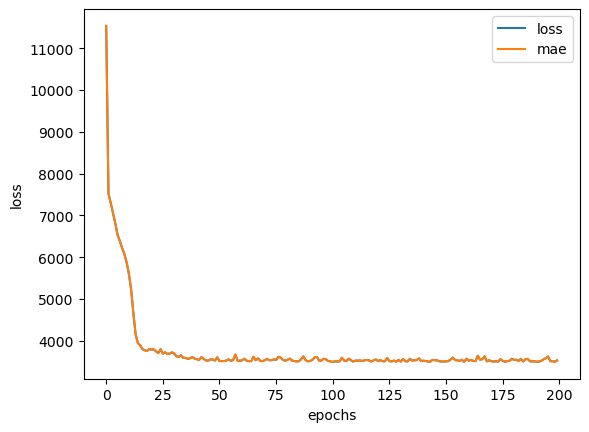

In [81]:
# plot history (also known as loss curve or training curve)
pd.DataFrame(histroy.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')